In [46]:
# Import dstools (absolute path required, please change to your systems settings)
import importlib
import sys

path = '/dstools-master/dstools/__init__.py'
name = 'dstools'

spec = importlib.util.spec_from_file_location(name, path)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module
spec.loader.exec_module(module)

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from dstools.datasets import bodyfat
from dstools.datasets import abalones

In [48]:
#df = pd.read_csv('advertising.csv')
df = abalones()

X = df.drop(columns=['Sex', 'Whole weight'])
y = df['Whole weight']
#X = df.drop(columns=['ID', 'Sales'])
#y = df['Sales']
df.head

<bound method NDFrame.head of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=147, test_size = 0.2, shuffle=True)

In [50]:

from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
ssc.fit(X_train)
X_train_z = ssc.transform(X_train)
print(X_train_z[0:5,:])

[[-0.32253883  0.07640064  0.01967612 -0.48912031 -0.41849761 -0.38471648
  -0.60008434]
 [ 0.59809529  0.8870542   2.46394279  0.67208827  0.36107775  2.05217034
   0.97015516]
 [ 0.09593122 -0.02493105 -0.36626073 -0.44384902 -0.34054007  0.77916976
   1.91229886]
 [ 0.84917732  0.7857225   0.7915498   1.02973146  1.03976689  1.72482733
   0.34205936]
 [ 1.10025935  1.19104928  1.04884103  1.20402593  1.04435263  0.92465554
   0.97015516]]


# Linear Regression

D:\Uni\5. Semester\Data Mining\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


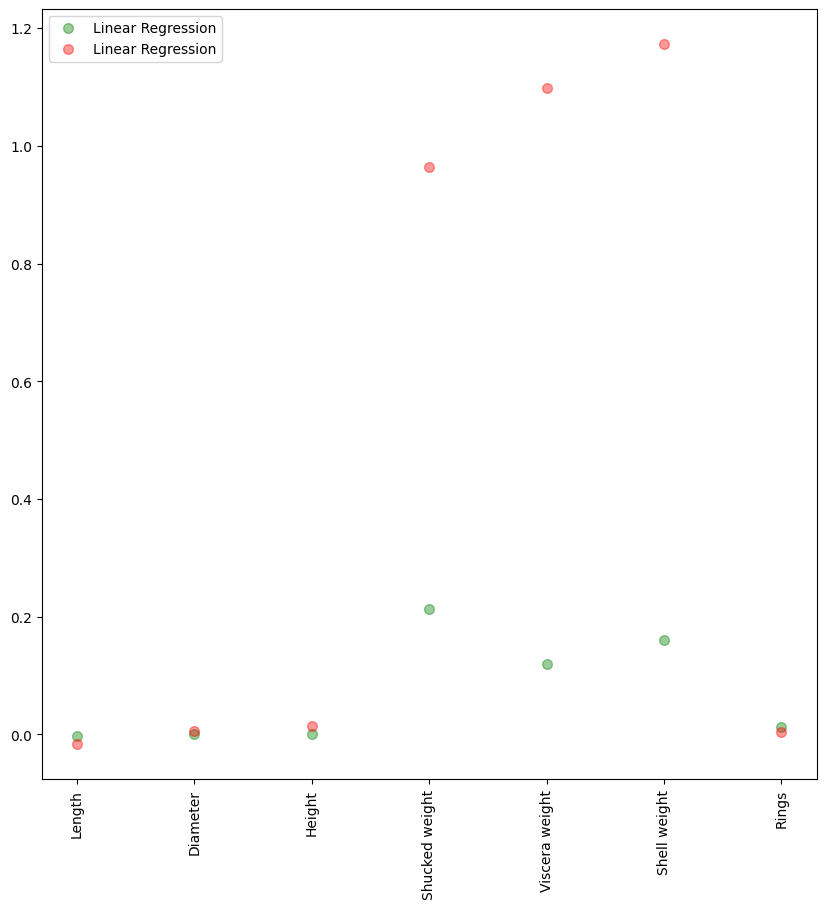

In [51]:
lr = LinearRegression()
lr.fit(X_train_z, y_train)
pred = lr.predict(X_test)

lr2 = LinearRegression()
lr2.fit(X_train, y_train)
pred = lr2.predict(X_test)

plt.figure(figsize = (10, 10))
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(X.columns,lr2.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='red',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Ridge Regression

In [52]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train_z, y_train)
X_pred = ridge.predict(X_test)

D:\Uni\5. Semester\Data Mining\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


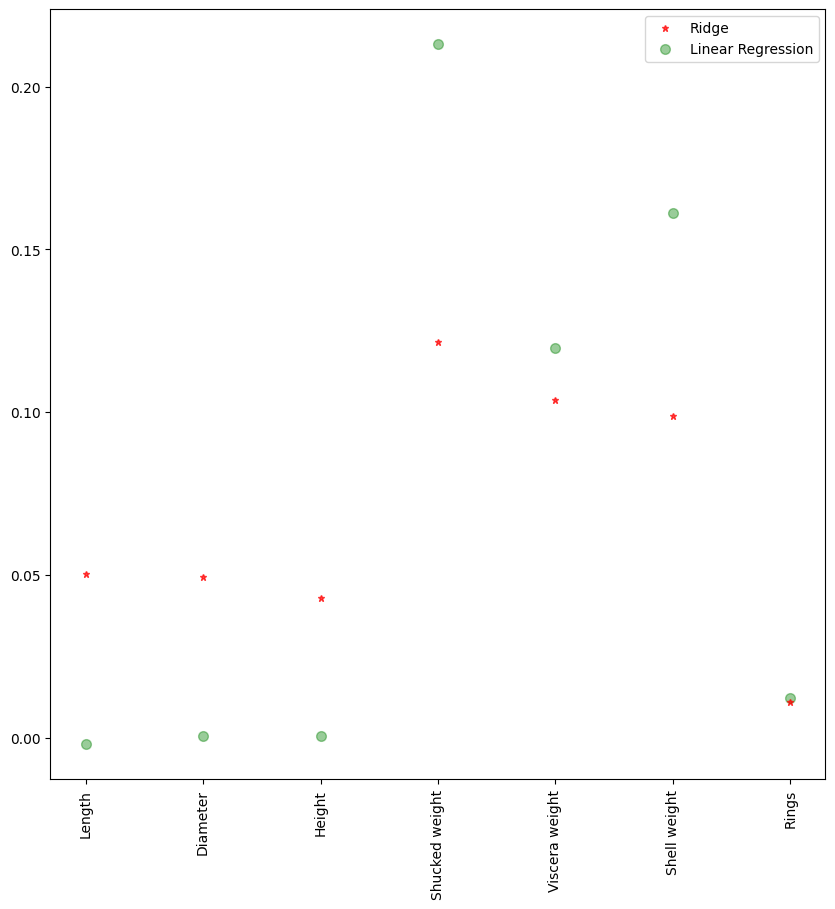

In [53]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge',zorder=7)
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Lasso Regression

In [54]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_z, y_train)

Lasso(alpha=0.1)

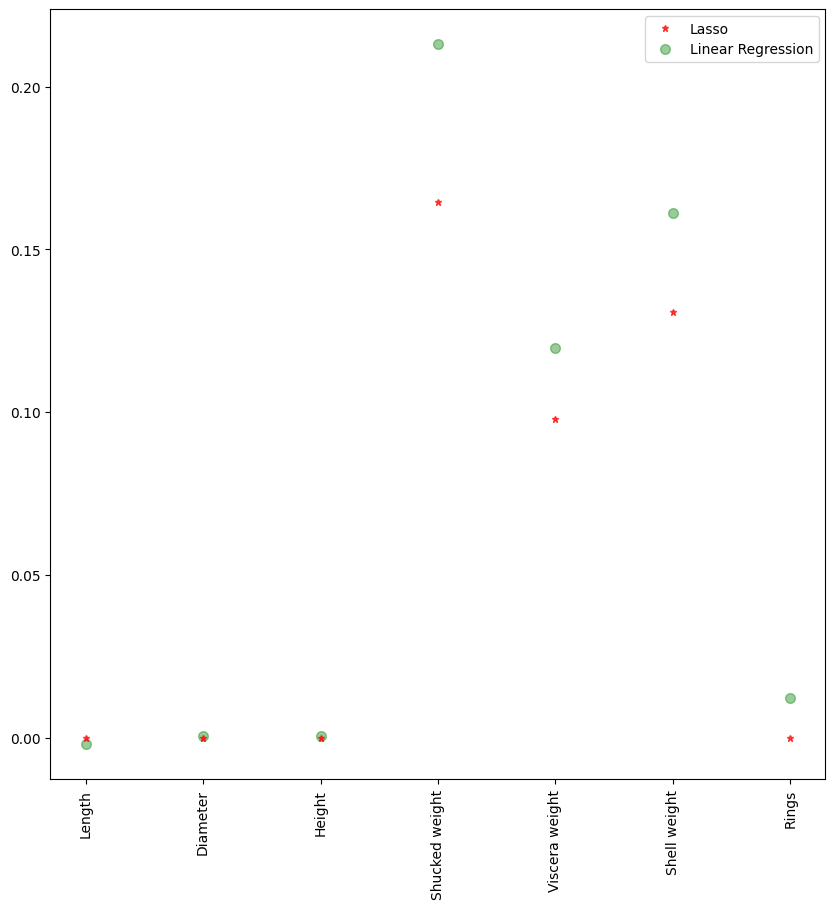

In [55]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso',zorder=7)
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Elastic Net

In [56]:
en = ElasticNet(alpha=10)
en.fit(X_train_z, y_train)

ElasticNet(alpha=10)

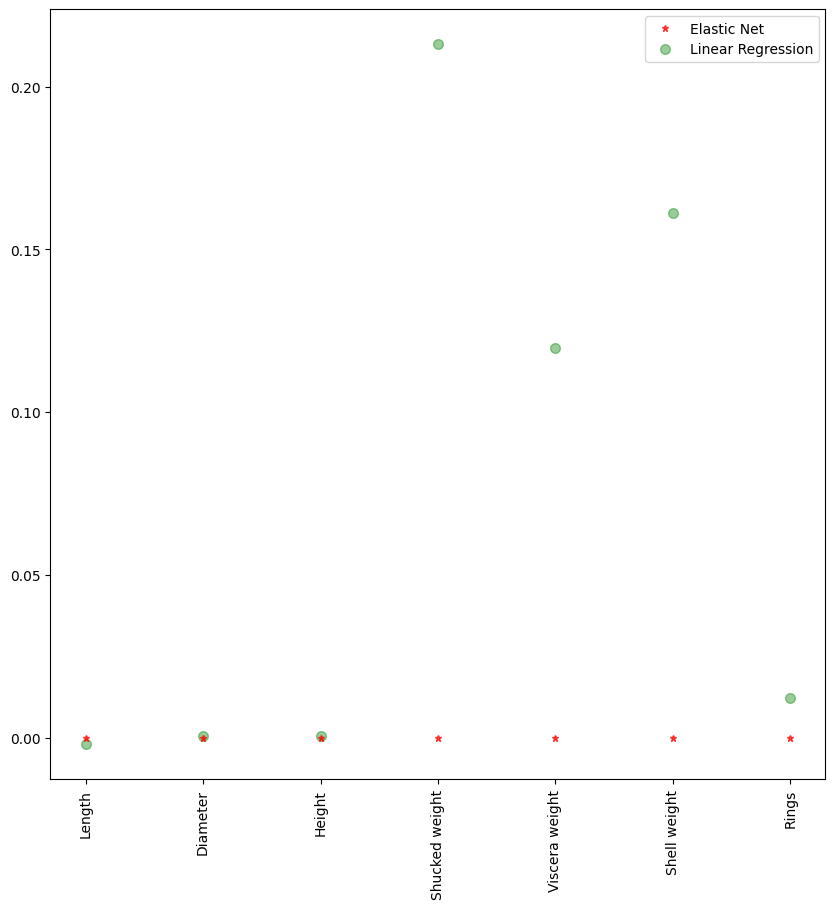

In [57]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,en.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Elastic Net',zorder=7)
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()